# Single Exponential Smoothing -- SES


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
data=pd.read_csv(r"C:\Users\komal\Downloads\Maida_Sales.csv")
data

,Date,value
0,01-01-2017,240
1,01-02-2017,260
2,01-03-2017,220
3,01-04-2017,310
4,01-05-2017,240
5,01-06-2017,240
6,01-07-2017,260
7,01-08-2017,230
8,01-09-2017,320
9,01-10-2017,240


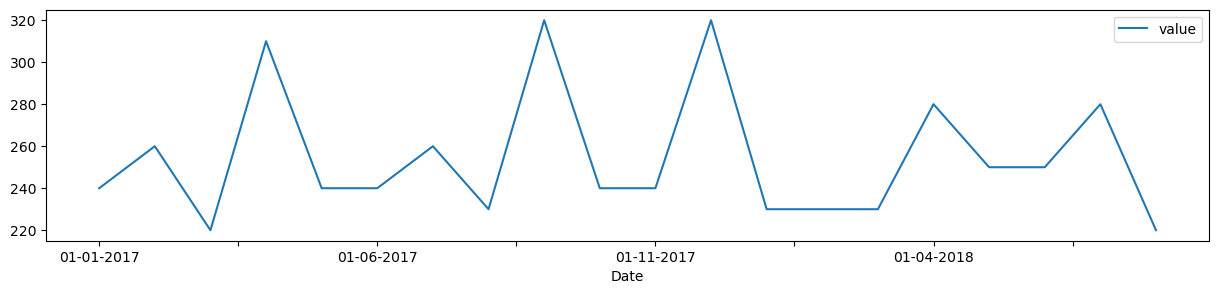

In [4]:
data.plot.line(x = 'Date',y = 'value',figsize=(15,3))
plt.show()  # Pattern = Random

In [5]:
data2 = data.set_index("Date")
data2.head()

,value
Date,
01-01-2017,240
01-02-2017,260
01-03-2017,220
01-04-2017,310
01-05-2017,240


# Model 

In [7]:
model = SimpleExpSmoothing(data2,initialization_method='known',initial_level=240).fit(smoothing_level=0.7, optimized=False)
model.params

C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 240.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [8]:
data2["Forecast"] = np.round(model.fittedvalues,2)
data2

,value,Forecast
Date,,
01-01-2017,240,240.00
01-02-2017,260,240.00
01-03-2017,220,254.00
01-04-2017,310,230.20
01-05-2017,240,286.06
01-06-2017,240,253.82
01-07-2017,260,244.15
01-08-2017,230,255.24
01-09-2017,320,237.57


# Future Forecasting 

In [10]:
fcast1 = np.round(model.forecast(1),2)
fcast1

C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


20    235.43
dtype: float64

#### Forecast Plot

<Axes: xlabel='Date'>

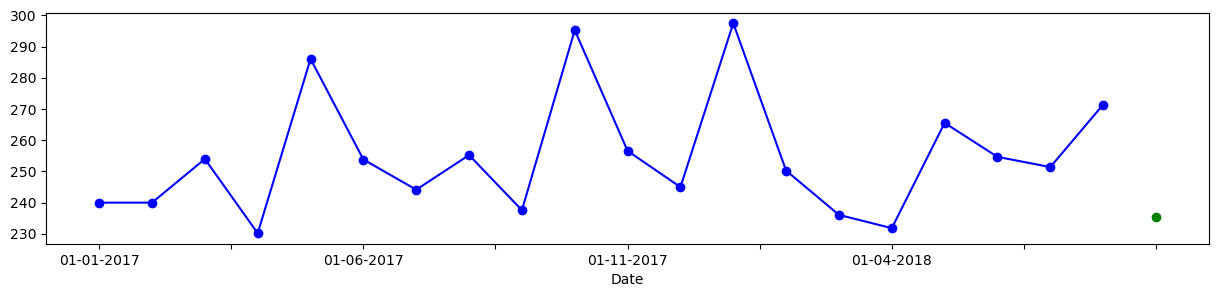

In [12]:
fcast1.plot(marker='o', color='green')
model.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

#### Accuracy of Model

In [14]:
mean_absolute_percentage_error = np.round(np.mean(np.abs(data2.value - data2.Forecast)/np.abs(data2.value))*100,2)
mean_absolute_percentage_error

13.49

* Model is bad Fit on Dataset 

# Auto model 

In [19]:
data = pd.read_csv(r"C:\Users\komal\Downloads\Maida_Sales.csv")
data.head(10)

,Date,value
0,01-01-2017,240
1,01-02-2017,260
2,01-03-2017,220
3,01-04-2017,310
4,01-05-2017,240
5,01-06-2017,240
6,01-07-2017,260
7,01-08-2017,230
8,01-09-2017,320
9,01-10-2017,240


In [21]:
data2 = data.set_index("Date")
data2.head()

,value
Date,
01-01-2017,240
01-02-2017,260
01-03-2017,220
01-04-2017,310
01-05-2017,240


In [23]:
fit_auto = SimpleExpSmoothing(data2).fit(optimized=True)
fit_auto.params

C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.06316696147090411,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 240.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [25]:
data2["Forecast"] = np.round(fit_auto.fittedvalues,2)
data2.head()

,value,Forecast
Date,,
01-01-2017,240,240.00
01-02-2017,260,240.00
01-03-2017,220,241.26
01-04-2017,310,239.92
01-05-2017,240,244.35


#### Accuracy of Model

In [28]:
mean_absolute_percentage_error = np.mean(np.abs(data2.value - data2.Forecast)/np.abs(data2.value))*100
mean_absolute_percentage_error

8.67618954574528

# Future Forecasting 

In [31]:
fcast1 = fit_auto.forecast(1)
fcast1 

C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


20    250.086933
dtype: float64

#### Auto model is best 